# Robot Simulation

With this robot simulation you can visualize any robot in matplotlib. You can display generated or manually entered joint angle positions, manually control the robot via joint angles, run trajectories, or manually perform the DH transformation.

To simulate a robot, you first need to create one. Import the required class:

In [5]:
from src.robot import Robot

Robots can be created either via their DH parameters and joint angle limits, or you can use the predefined robots YouBot and Baxter by passing `name='youbot'` or `name='baxter'`.

Creating a robot with custom DH parameters could look like this:

```python
import numpy as np

dh_theta_values = np.array([np.pi / 2, np.pi / 2, 0, np.pi / 2, np.pi / 2])
dh_alpha_values = np.array([-np.pi / 2, 0, 0, np.pi / 2, -np.pi / 2])
dh_a_values = np.array([0.093, 0.25, 0.875, 0.2, 0.2])
dh_d_values = np.array([0.425, 0.2, 0, 0.089, 0.18])

dh_values = [dh_theta_values, dh_d_values, dh_a_values, dh_alpha_values]

a1 = [120, -120]
a2 = [80, -65]
a3 = [140, -140]
a4 = [90.5, -90.5]
a5 = [130.5, -167.5]

joint_limits = [a1, a2, a3, a4, a5]

custom_robot = Robot(dh_values=dh_values, joint_limits=joint_limits)
```

#### However, we will now create a YouBot using its name:

In [6]:
youbot = Robot(robot='youbot')

To display the robot in matplotlib, you need to create a `RobotAnimation`. When creating this object, pass the robot you just created. You can use `basis=True|False` to toggle whether the joint coordinate frames should be displayed. The `RobotAnimation` class provides the following functions:

```python
# Plots the robot with the given joint angle positions @q_array
def draw_robot(q_array)

# Plots the robot and an optionally provided goal @goal. The robot can be manually controlled via sliders
def manual_control(goal=None)

# Plots a trajectory from a given vector @trajectory of joint angle positions
def draw_trajectory_robot(trajectory)

# Plots the robot and lets the user manually perform the DH transformation
def dh_animation()
```

We create a `RobotAnimation` and pass the joint angle positions for the candle pose. To display the interactive plot, you need to include the matplotlib backend with `%matplotlib notebook` in each cell where you want to do this.

Try different joint angle positions for the robot. Pay attention to the joint angle limits of the robot.
If you're unsure about them, you can query them with `youbot.joint_limits`.

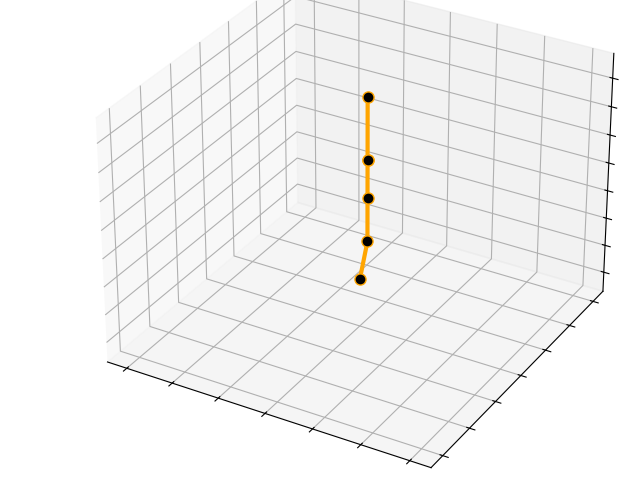

In [7]:
%matplotlib widget

from src.robot_animation import RobotAnimation
import numpy as np

joint_pos = [0,np.radians(90),0,np.radians(90),0]
ani0 = RobotAnimation(youbot, basis=False)
ani0.draw_robot(joint_pos)

If you want to display a new animation, create a new object. You can also reuse the old one, but the animation will then run in the cell where you first animated the old object.

Here is an example of how to manually control your robot.

IntSlider(value=0, description='q1 [°]', max=169, min=-169)

IntSlider(value=25, description='q2 [°]', max=90, min=-65)

IntSlider(value=-5, description='q3 [°]', max=146, min=-151)

IntSlider(value=0, description='q4 [°]', max=102, min=-102)

IntSlider(value=0, description='q5 [°]', max=167, min=-167)

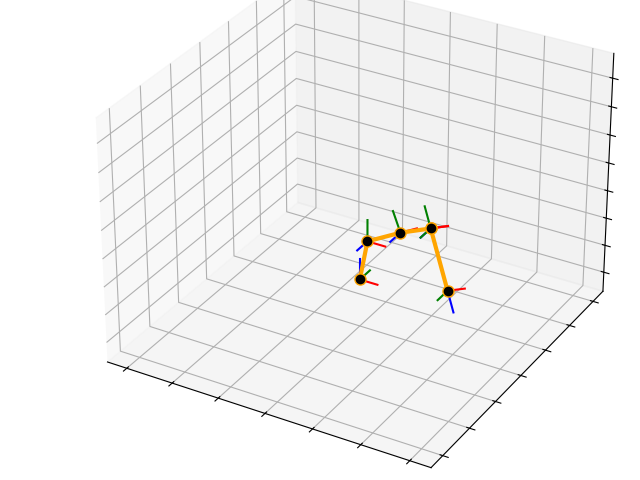

In [8]:
%matplotlib widget

ani1 = RobotAnimation(youbot)
ani1.manual_control()

You can also pass a goal. To do this, you can generate data for your robot. Import the DataHandler and generate a `goal_pos` that you pass as the goal. When generating data points, it is already taken into account that the robot you created can reach them.

Now try to manually move the robot to the generated goal.

In [ ]:
from src.datahandler import DataHandler

datahandler = DataHandler(youbot)
datahandler.set_torch(True)
tcp, joint_pos = datahandler(2048, normalize=False)
tcp = tcp.cpu().numpy()
datahandler.set_torch(False)

In [ ]:
%matplotlib widget

ani1 = RobotAnimation(youbot)
ani1.manual_control(tcp[1][3::4])

To run a trajectory, use the `src.trajectories` module which provides various predefined motion patterns.

**Available trajectories:**
| Name | Description | Joints Affected |
|------|-------------|-----------------|
| `circle` | Sweep joint 1 from max to min | Joint 1 only |
| `wave` | Sinusoidal motion with phase offset | All joints |
| `reach` | Extend arm outward then retract | Joints 2-3 |
| `spiral` | Combined rotation + reach | Joints 1 + 2-3 |
| `random_smooth` | Random waypoints with cubic interpolation | All joints |
| `figure_eight` | Figure-8 pattern in joint space | Joints 1-2 |
| `square` | Square pattern with sharp 90° corners | Joints 1-2 |
| `pringles` | True pringles with 90° phase shift | Joints 1-2 |

Try different trajectory types by changing `trajectory_type` below.

In [ ]:
from src.trajectories import get_trajectory, list_trajectories

# Choose a trajectory type (see table above)
trajectory_type = "wave"

# Generate trajectory (returns joint angles in radians)
trajectory = get_trajectory(trajectory_type, youbot, n_frames=60)
print(f"Available: {list_trajectories()}")
print(f"Using '{trajectory_type}': {trajectory.shape}")

In [ ]:
%matplotlib widget

ani2 = RobotAnimation(youbot)
ani2.draw_trajectory_robot(trajectory)

With the robot simulation, you can visually follow the DH transformation. You start at the first joint and rotate the coordinate system to the next joint. Use the sliders Rot $\theta$, Trans d, Trans a, Rot $\alpha$ for this. Make sure to use the DH transformation according to convention.

Accuracy requirements:
- For rotation, you must be accurate to the degree. If the DH parameters require 90°, a value of at least 89.99° will be accepted.
- For translation, you can deviate by one millimeter.

Once you have rotated the angle into the joint with the correct parameters, a message will be displayed in the plot. Only then use the top slider to switch to the next joint.

Now perform the DH transformation for the YouBot and enter the parameters you found in the table below.

In [ ]:
%matplotlib widget

ani3 = RobotAnimation(youbot)
ani3.dh_animation(position=[0,np.radians(90), 0, 0, np.radians(90)])

You can enter your calculated parameters in this table.

#### DH Parameter Table youBot

$\begin{array}{rr} \hline
\mathbf{Joint} &\mathbf{\theta} &\mathbf{d} &\mathbf{a} &\mathbf{\alpha} \\ \hline
\mathbf{1} & & & & \\ \hline
\mathbf{2} & & & & \\ \hline
\mathbf{3} & & & & \\ \hline
\mathbf{4} & & & & \\ \hline
\mathbf{5} & & & & \\ \hline
\end{array}$